# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [153]:
import pandas as pd

In [154]:
#importing from local directory
path = '/Users/ridleyleisy/Documents/lambda/unit_one/DS-Unit-1-Sprint-1-Dealing-With-Data/'
df = pd.read_csv(path+'haberman.data',header=None)

In [155]:
#changing column names
cols = ['age','operation_year','nodes_detected','survival']
df.columns = cols

In [223]:
df.count()

age               306
operation_year    306
nodes_detected    306
survival          306
age_bins          306
dtype: int64

In [156]:
#validating no null values
df.isnull().sum()

age               0
operation_year    0
nodes_detected    0
survival          0
dtype: int64

In [157]:
# mapping survival feature to binary 0 and 1
def change_survival_feature(num):
    if num == 2:
        num = 0
    return num

In [158]:
df['survival'] = df['survival'].map(change_survival_feature)

In [159]:
df.head()

,age,operation_year,nodes_detected,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

## Imports

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Initial Look

In [161]:
df.describe()

,age,operation_year,nodes_detected,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [162]:
df.corr()

,age,operation_year,nodes_detected,survival
age,1.000000,0.089529,-0.063176,-0.067950
operation_year,0.089529,1.000000,-0.003764,0.004768
nodes_detected,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


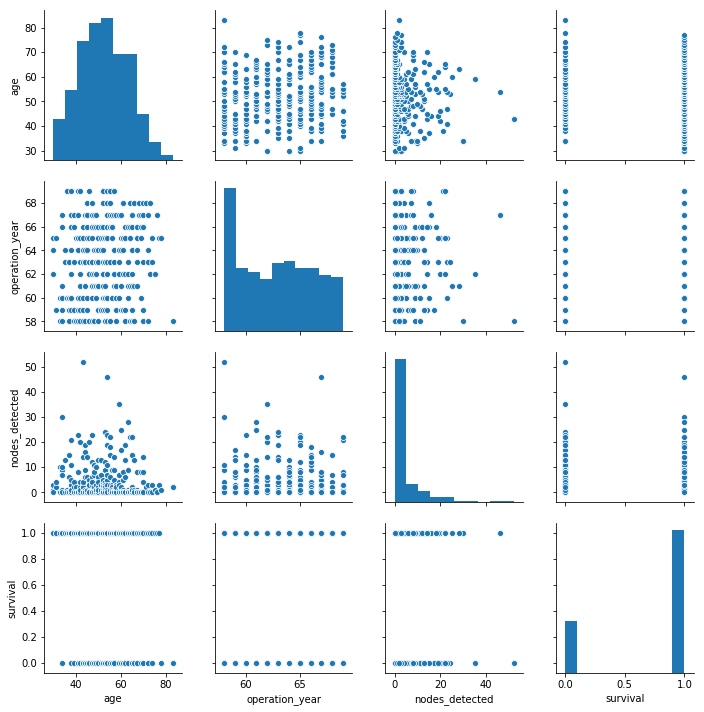

In [221]:
sns.pairplot(df)

In [163]:
# new column with age bins
df['age_bins'] = pd.cut(df['age'],bins=10)

In [164]:
df.groupby('age_bins')['age'].count()

age_bins
(29.947, 35.3]    16
(35.3, 40.6]      27
(40.6, 45.9]      46
(45.9, 51.2]      53
(51.2, 56.5]      55
(56.5, 61.8]      41
(61.8, 67.1]      41
(67.1, 72.4]      18
(72.4, 77.7]       7
(77.7, 83.0]       2
Name: age, dtype: int64

## Splitting df into three sections:
- all observations
- only survived
- didn't survive

In [165]:
df_no_survive = df.loc[df['survival'] == 0]
df_survive = df.loc[df['survival'] == 1]

## Age vs Survival

In [166]:
# percentage of people that didn't survive broken down by age bins
df_no_survive.groupby('age_bins')['survival'].count() / df.groupby('age_bins')['survival'].count()

age_bins
(29.947, 35.3]    0.125000
(35.3, 40.6]      0.074074
(40.6, 45.9]      0.326087
(45.9, 51.2]      0.301887
(51.2, 56.5]      0.327273
(56.5, 61.8]      0.219512
(61.8, 67.1]      0.292683
(67.1, 72.4]      0.222222
(72.4, 77.7]      0.142857
(77.7, 83.0]      1.000000
Name: survival, dtype: float64

In [167]:
# percentage of people that did survive broken down by age
1 - df_no_survive.groupby('age_bins')['survival'].count() / df.groupby('age_bins')['survival'].count()

age_bins
(29.947, 35.3]    0.875000
(35.3, 40.6]      0.925926
(40.6, 45.9]      0.673913
(45.9, 51.2]      0.698113
(51.2, 56.5]      0.672727
(56.5, 61.8]      0.780488
(61.8, 67.1]      0.707317
(67.1, 72.4]      0.777778
(72.4, 77.7]      0.857143
(77.7, 83.0]      0.000000
Name: survival, dtype: float64

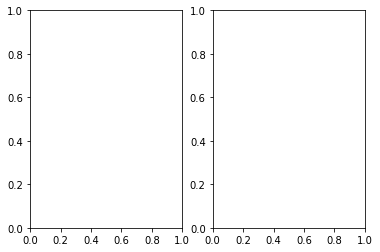

In [225]:
fig, (ax1, ax2) = plt.subplots(ncols=2);

In [215]:
ax1.set_title('Did not survive')
ax2.set_title('Did survive')

Text(0.5, 1.0, 'Did survive')

In [216]:
sns.distplot(df_no_survive['age'],ax=ax1)
sns.distplot(df_survive['age'],ax=ax2)

In [217]:
fig.set_figwidth(20)

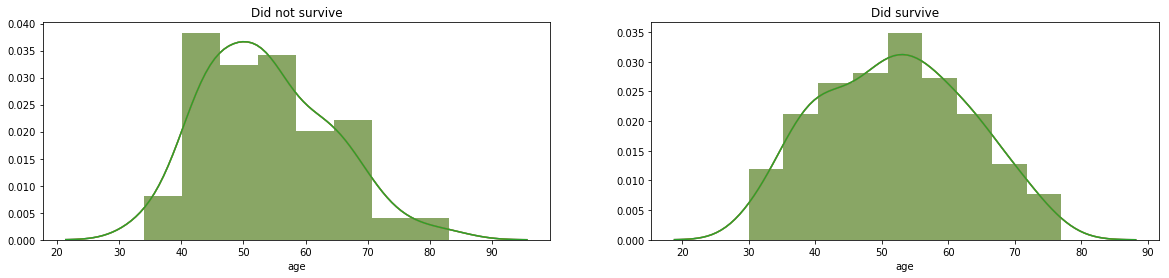

In [218]:
# looks like survival rates increase as you get older
fig

## Nodes vs Age

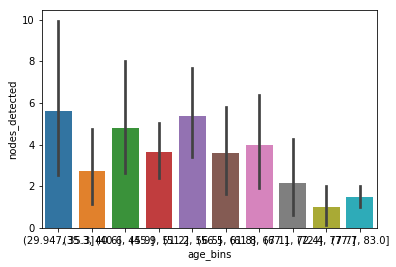

In [220]:
# looks like the majority of nodes are detected in the earlier stages of life
sns.barplot(x=df['age_bins'],y=df['nodes_detected'],data=df)

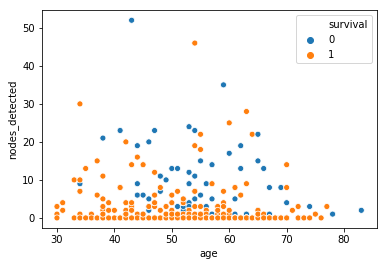

In [168]:
sns.scatterplot(x=df['age'],y=df['nodes_detected'],data=df,hue='survival')

## Nodes vs Survival

In [184]:
# do more nodes increase the percentage of not surviving? looking at the percentage of nodes detected for those who
# didn't survive against the entire dataset
nodes_df_no_survive = (df_no_survive.groupby('nodes_detected')['survival'].count() / df.groupby('nodes_detected')['survival'].count()).dropna()


In [182]:
nodes_df_no_survive = pd.DataFrame(nodes_df_no_survive).reset_index()


In [185]:
nodes_df_no_survive.tail()

nodes_detected
22    0.333333
23    1.000000
24    1.000000
35    1.000000
52    1.000000
Name: survival, dtype: float64

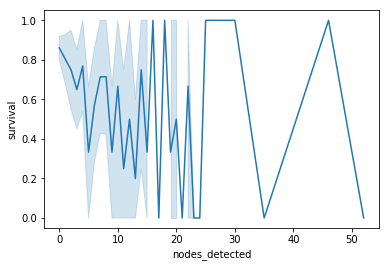

In [178]:
sns.lineplot(df['nodes_detected'], df['survival'],data=df)

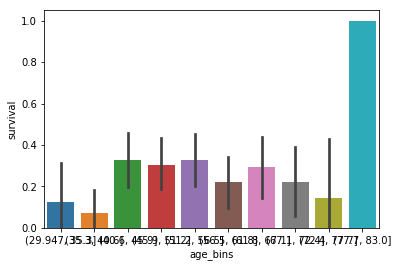

In [93]:
# survival rates compared with age
sns.barplot(x=df['age_bins'],y=df['survival'],data=df)

## Age vs Nodes detected

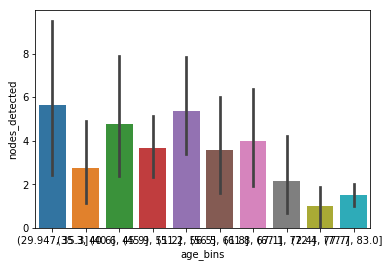

In [222]:
sns.barplot(x=df['age_bins'],y=df['nodes_detected'],data=df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
Weirdly, age. Survival rates start high in the early bins (0 - 40), but then decrease dramatically between (40 - 56). After 56, the survival rates start to increase again (besides the outlier in (77.7, 83.0]). Although it's not a strong relationship, there is a slight one there. See dist chart above

- What is at least one feature that looks to have a negative relationship with survival?

The more nodes you have the less likely you are to survive. See nodes detected and survival rate line chart above. 

- How are those two features related with each other, and what might that mean?

Well, detection might occur more frequently in the early years hence the spike in detection/death. As the person starts to get older, they are might be less inclined to seek detection or pass away from other illnesses hence the slight correlation between aging and increased survival.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.